In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# import plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from IPython.display import display

%matplotlib inline

In [7]:
dataset = pd.read_csv('/home/newarbhai/journey-with-python/CompleteDataset.csv')

/home/newarbhai/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
display(dataset.head())

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
interesting_columns = [
    'Name', 
    'Age', 
    'Photo', 
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
dataset = pd.DataFrame(dataset, columns=interesting_columns)
display(dataset.head())
#display(dataset)

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [12]:
# Drop NA values
dataset = dataset.dropna()

In [13]:
# Numeric columns of Value and Wage
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
dataset['ValueNum'] = dataset['Value'].apply(lambda x: str2number(x))
dataset['WageNum'] = dataset['Wage'].apply(lambda x: str2number(x))

display(dataset.head())

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0


In [14]:
# Categorical columns of Value and Wage
max_value = float(dataset['ValueNum'].max() + 1)
max_wage = float(dataset['WageNum'].max() + 1)

print("Max value:", max_value, "Max_wage:", max_wage)

# Supporting function for creating category columns 'ValueCategory' and 'WageCategory'
def mappingAmount(x, max_amount):
    for i in range(0, 10):
        if x >= max_amount/10*i and x < max_amount/10*(i+1):
            return i
        
dataset['ValueCategory'] = dataset['ValueNum'].apply(lambda x: mappingAmount(x, max_value))
dataset['WageCategory'] = dataset['WageNum'].apply(lambda x: mappingAmount(x, max_wage))
display(dataset.head())

Max value: 123000001.0 Max_wage: 565001.0


,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum,ValueCategory,WageCategory
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,7,9
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,8,9
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,9,4
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,7,9
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0,4,4


In [15]:
# Add two categories 0 and 1 and inform if player value/wage is highier then mean value
mean_value = float(dataset["ValueNum"].mean())
mean_wage = float(dataset["WageNum"].mean())

# Supporting function for creating category columns 'OverMeanValue' and 'OverMeanWage'
def overValue(x, limit):
    if x > limit:
        return 1
    else:
        return 0
    
dataset['OverMeanValue'] = dataset['ValueNum'].apply(lambda x: overValue(x, mean_value))
dataset['OverMeanWage'] = dataset['WageNum'].apply(lambda x: overValue(x, mean_wage))

display(dataset.head())

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum,ValueCategory,WageCategory,OverMeanValue,OverMeanWage
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,7,9,1,1
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,8,9,1,1
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,9,4,1,1
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,7,9,1,1
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0,4,4,1,1


In [16]:
# Potential points
dataset['PotentialPoints'] = dataset['Potential'] - dataset['Overall']
display(dataset.head())

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum,ValueCategory,WageCategory,OverMeanValue,OverMeanWage,PotentialPoints
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,7,9,1,1,0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,8,9,1,1,0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,9,4,1,1,2
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,7,9,1,1,0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0,4,4,1,1,0


In [17]:
# Preferred position
#To make things simpler we select first position from list as preferred and save it in 'Position' column. We will also count number of alternative positions and store it in column 'PositionNum'.
dataset['Position'] = dataset['Preferred Positions'].str.split().str[0]
dataset['PositionNum'] = dataset['Preferred Positions'].apply(lambda x: len(x.split()))
display(dataset.head())

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum,ValueCategory,WageCategory,OverMeanValue,OverMeanWage,PotentialPoints,Position,PositionNum
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,7,9,1,1,0,ST,2
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,8,9,1,1,0,RW,1
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,9,4,1,1,2,LW,1
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,7,9,1,1,0,ST,1
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0,4,4,1,1,0,GK,1


In [18]:
# Continent
# List of countries for each continent
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

# Function matching continent to countries
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

dataset['Continent'] = dataset['Nationality'].apply(lambda x: find_continent(x, continents))
display(dataset.head())

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum,ValueCategory,WageCategory,OverMeanValue,OverMeanWage,PotentialPoints,Position,PositionNum,Continent
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,7,9,1,1,0,ST,2,Europe
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,8,9,1,1,0,RW,1,South America
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,9,4,1,1,2,LW,1,South America
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,7,9,1,1,0,ST,1,South America
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0,4,4,1,1,0,GK,1,Europe


In [19]:
top_k = dataset.sort_values("Overall", ascending=False).reset_index().head(1000)[["Name", "Nationality", "Continent", "Overall", "Club"]]
display(top_k.head())

,Name,Nationality,Continent,Overall,Club
0,Cristiano Ronaldo,Portugal,Europe,94,Real Madrid CF
1,L. Messi,Argentina,South America,93,FC Barcelona
2,Neymar,Brazil,South America,92,Paris Saint-Germain
3,L. Suárez,Uruguay,South America,92,FC Barcelona
4,M. Neuer,Germany,Europe,92,FC Bayern Munich


In [20]:
Africa = top_k[top_k["Continent"]=='Africa']
Antarctica = top_k[top_k["Continent"]=='Antarctica']
Asia = top_k[top_k["Continent"]=='Asia']
Australia_Oceania =  top_k[top_k["Continent"]=='Australia_Oceania']
Europe = top_k[top_k["Continent"]=='Europe']
North_america = top_k[top_k["Continent"]=='North_america']
South_america = top_k[top_k["Continent"]=='South_america']

data = {}
data["name"] = "DISTRIBUTION OF TOP K PLAERS DUE TO NATIONALITY"
data["children"] = []
# Split datasetset into Continents:
for continent in top_k['Continent'].unique():
    
    continent_set = top_k[top_k["Continent"]==continent]
    continent_dict = {}
    continent_dict["name"] = continent
    continent_dict["children"] = []
    
    for country in continent_set['Nationality'].unique():
        
        countries_set = continent_set[continent_set['Nationality']==country][['Name', 'Overall']]
        
        country_dict = {}
        country_dict["name"] = country
        country_dict["children"] = []
        
        for player in countries_set.values:
            
            player_dict = {}
            player_dict['name'] = player[0]
            player_dict['size'] = player[1]
            country_dict["children"].append(player_dict)
            
        continent_dict['children'].append(country_dict)
        
    data["children"].append(continent_dict)

In [21]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.node {
  cursor: pointer;
}

.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}

.node--leaf {
  fill: white;
}

.label {
  font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}

.label,
.node--root,
.node--leaf {
  pointer-events: none;
}

</style>
<svg width="800" height="800"></svg>
"""

In [22]:
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolatePlasma)
    .domain([-4, 4]);

var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);

d3.json("output.json", function(error, root) {
  if (error) throw error;

  root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

  var focus = root,
      nodes = pack(root).descendants(),
      view;

  var circle = g.selectAll("circle")
    .data(nodes)
    .enter().append("circle")
      .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
      .style("fill", function(d) { return d.children ? color(d.depth) : null; })
      .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
    .data(nodes)
    .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });

  var node = g.selectAll("circle,text");

  svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });

  zoomTo([root.x, root.y, root.r * 2 + margin]);

  function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

    transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }

  function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
  });
 """

In [23]:
import json
with open('output.json', 'w') as outfile:  
    json.dump(data, outfile)

In [24]:
from string import Template
import IPython
from IPython.core.display import HTML, display_html, display_javascript, Javascript

h = HTML(html_string)
j = Javascript(js_string)
display_html(h)
display_javascript(j)

<!DOCTYPE html>

In [25]:
# Grouping the data by countries
countries = dataset.groupby("Nationality").size().reset_index(name="Count")

In [26]:
trace1 = dict(
        type = 'choropleth',
        locations = countries["Nationality"],
        locationmode = 'country names',
        z = countries["Count"],
        text = countries["Nationality"],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = "Amount of Players"),
      )

data = [trace1]

layout = dict(
    title = "Nationalities of FIFA 18 Players",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator' #https://en.wikipedia.org/wiki/List_of_map_projections
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.geo.projection
        Received value: 'Mercator'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['equirectangular', 'mercator', 'orthographic', 'natural
            earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4',
            'azimuthal equal area', 'azimuthal equidistant', 'conic
            equal area', 'conic conformal', 'conic equidistant',
            'gnomonic', 'stereographic', 'mollweide', 'hammer',
            'transverse mercator', 'albers usa', 'winkel tripel',
            'aitoff', 'sinusoidal']

In [27]:
players_value = dataset.sort_values("ValueNum", ascending=False).head(20).reset_index()[["Name", "Overall", "PotentialPoints", "ValueNum", "Age"]]

In [28]:
display(players_value)

,Name,Overall,PotentialPoints,ValueNum,Age
0,Neymar,92,2,123000000.0,25
1,L. Messi,93,0,105000000.0,30
2,L. Suárez,92,0,97000000.0,30
3,Cristiano Ronaldo,94,0,95500000.0,32
4,R. Lewandowski,91,0,92000000.0,28
5,E. Hazard,90,1,90500000.0,26
6,K. De Bruyne,89,3,83000000.0,26
7,T. Kroos,90,0,79000000.0,27
8,P. Dybala,88,5,79000000.0,23
9,G. Higuaín,90,0,77000000.0,29


In [29]:
trace1 = go.Bar(
    x = players_value["Name"].tolist(),
    y = players_value["Overall"].tolist(),
    name='Overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = players_value["Name"].tolist(),
    y = players_value["PotentialPoints"].tolist(),
    name='Potential',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = players_value["Name"].tolist(),
    y = (players_value["ValueNum"] / 1000000).tolist(),
    name='Value [M€]',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Top K players!!!',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Overall/Potential',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Player Names'),
    yaxis2=dict(
        title='Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 20
    ),
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

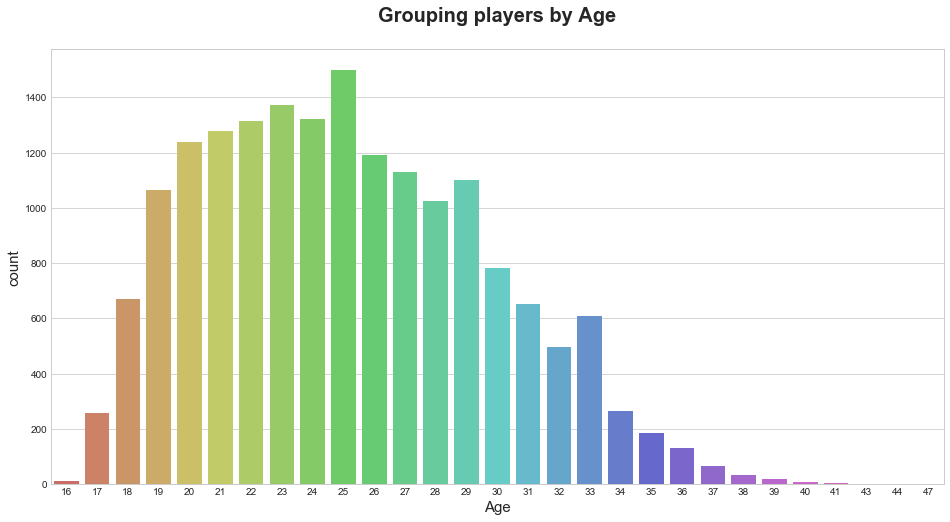

In [31]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Age", data=dataset, palette="hls");
plt.show()

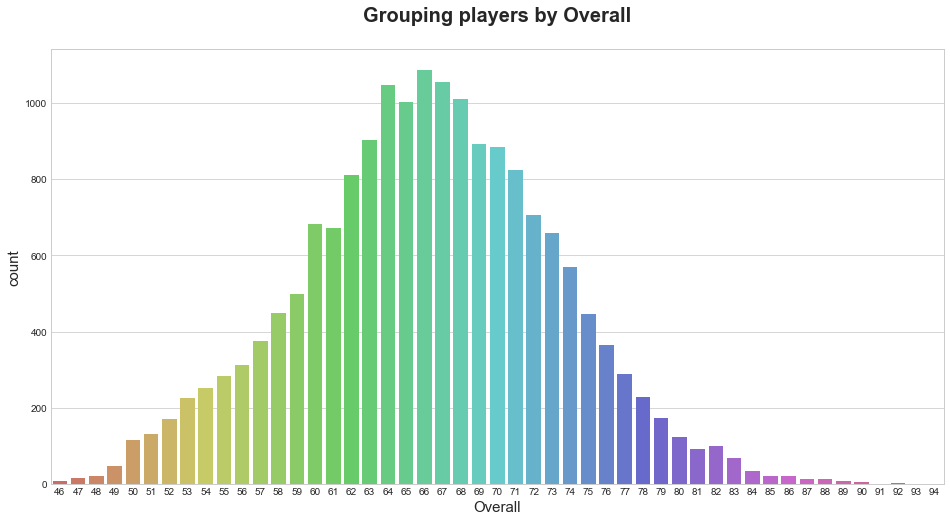

In [32]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Overall", data=dataset, palette="hls");
plt.show()

In [35]:
# Selecting players with age smaller then 40 
dataset40 = dataset.loc[dataset['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset40.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset40.groupby("Age")["Overall"].mean().values
# Selecting mean Overall from DataFrame
potential = dataset40.groupby("Age")["Potential"].mean().values

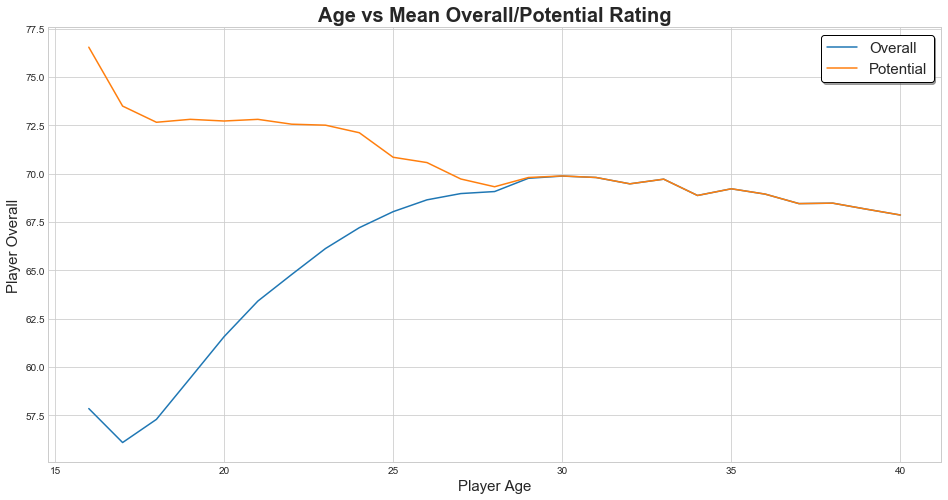

In [36]:
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [37]:
# Selecting mean PotentialPoints from DataFrame
potential_points = dataset40.groupby("Age")["PotentialPoints"].mean().values

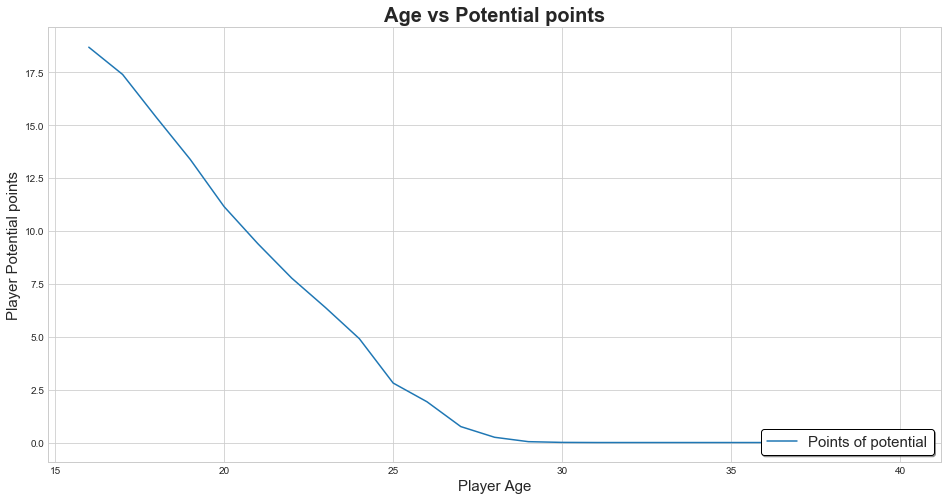

In [38]:
plt.figure(figsize=(16,8))
plt.title('Age vs Potential points', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Potential points', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, potential_points, label="Points of potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

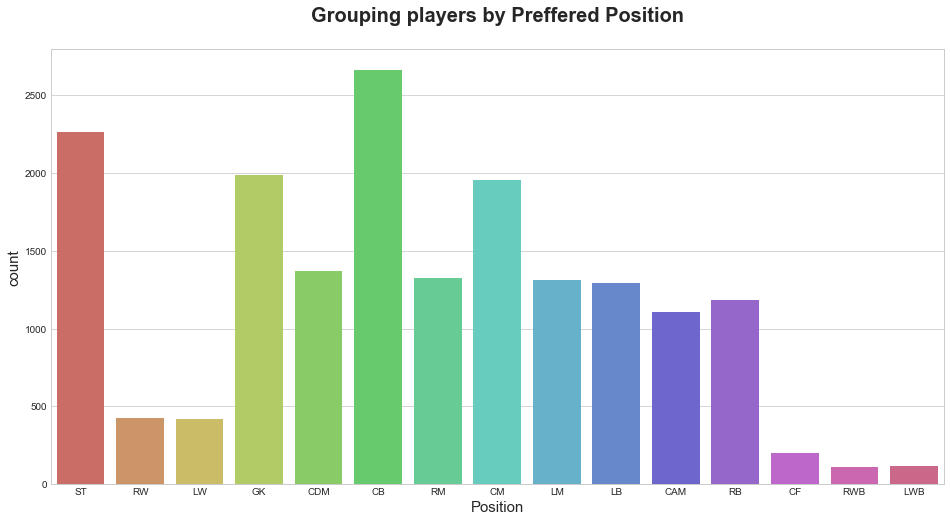

In [39]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preffered Position', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Position", data=dataset, palette="hls");
plt.show()

In [40]:
sorted_players = dataset.sort_values(["ValueNum"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" ,"Club", "Value"]].values

In [41]:
from IPython.display import HTML

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Photo,Name,Age,Nationality,Club,Value
,Neymar,25,Brazil,Paris Saint-Germain,€123M
,L. Messi,30,Argentina,FC Barcelona,€105M
,L. Suárez,30,Uruguay,FC Barcelona,€97M
,Cristiano Ronaldo,32,Portugal,Real Madrid CF,€95.5M
,R. Lewandowski,28,Poland,FC Bayern Munich,€92M
,E. Hazard,26,Belgium,Chelsea,€90.5M
,K. De Bruyne,26,Belgium,Manchester City,€83M
,T. Kroos,27,Germany,Real Madrid CF,€79M
,P. Dybala,23,Argentina,Juventus,€79M
,G. Higuaín,29,Argentina,Juventus,€77M


In [42]:
sorted_players = dataset.sort_values(["WageNum"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" ,"Club", "Wage"]].values

In [43]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Photo,Name,Age,Nationality,Club,Wage
,Cristiano Ronaldo,32,Portugal,Real Madrid CF,€565K
,L. Messi,30,Argentina,FC Barcelona,€565K
,L. Suárez,30,Uruguay,FC Barcelona,€510K
,G. Bale,27,Wales,Real Madrid CF,€370K
,R. Lewandowski,28,Poland,FC Bayern Munich,€355K
,L. Modrić,31,Croatia,Real Madrid CF,€340K
,T. Kroos,27,Germany,Real Madrid CF,€340K
,S. Agüero,29,Argentina,Manchester City,€325K
,Sergio Ramos,31,Spain,Real Madrid CF,€310K
,K. Benzema,29,France,Real Madrid CF,€295K


In [44]:
value_distribution = dataset.sort_values("WageNum", ascending=False).reset_index().head(100)[["Name", "WageNum"]]
value_distribution_values = value_distribution["WageNum"].apply(lambda x: x/1000)

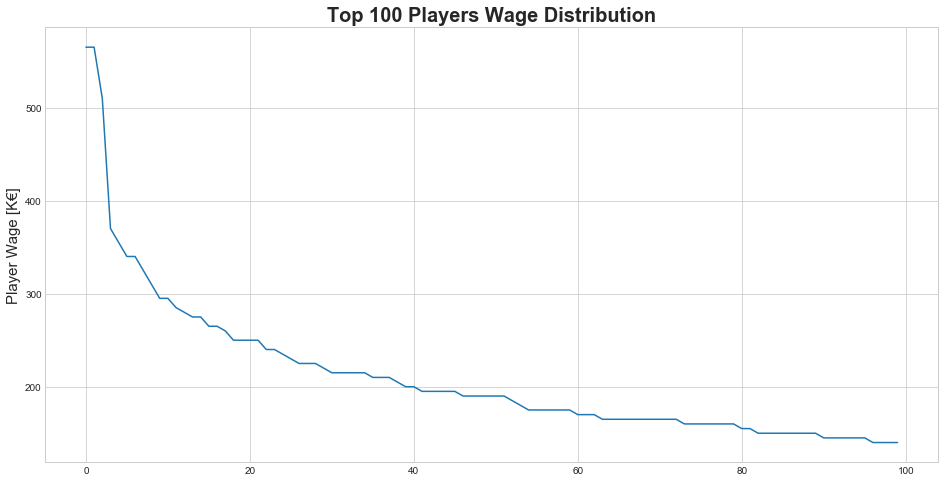

In [45]:
plt.figure(figsize=(16,8))
plt.title('Top 100 Players Wage Distribution', fontsize=20, fontweight='bold')
plt.ylabel('Player Wage [K€]', fontsize=15)
sns.set_style("whitegrid")
plt.plot(value_distribution_values)
plt.show()

In [46]:
print('Mean value of player in FIFA 18 is around: €' + str(round(mean_value, -5)) + '.')

Mean value of player in FIFA 18 is around: €2400000.0.


In [47]:
players_value = dataset.groupby("OverMeanValue").size().reset_index(name='NumberOfPlayers')
display(players_value)

,OverMeanValue,NumberOfPlayers
0,0,13719
1,1,4014


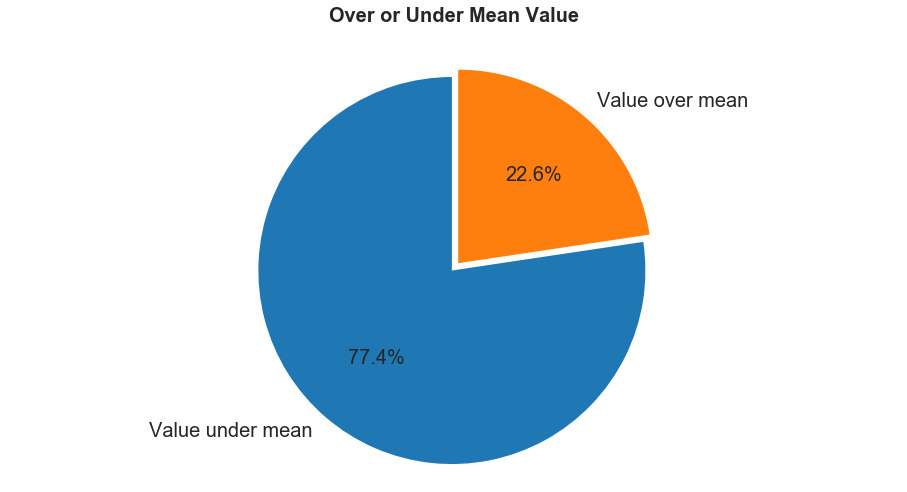

In [48]:
plt.figure(figsize=(16,8))
plt.title('Over or Under Mean Value', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Value under mean', 'Value over mean'
explode=(0, 0.05)
plt.rcParams['font.size'] = 20.0
plt.pie(players_value["NumberOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

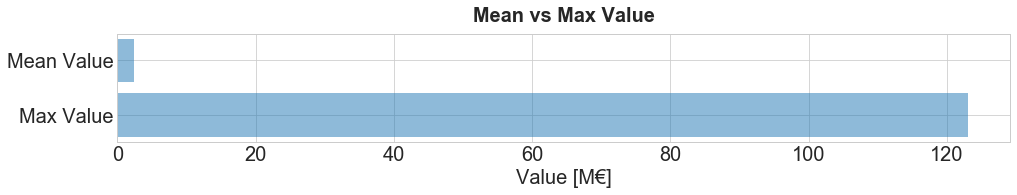

In [49]:
plt.figure(figsize=(16,2))
plt.title('Mean vs Max Value', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Value [M€]')

max_value = dataset['ValueNum'].max()
objects = ('Max Value', 'Mean Value')
y_pos = np.arange(len(objects))
performance = [max_value/1000000, mean_value/1000000]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)

plt.show()

In [50]:
print('Mean wage of player in FIFA 18 is around: €' + str(round(mean_wage, -3)) + '.')

Mean wage of player in FIFA 18 is around: €12000.0.


In [51]:
players_wage = dataset.groupby("OverMeanWage").size().reset_index(name='NumberOfPlayers')
players_wage

,OverMeanWage,NumberOfPlayers
0,0,13169
1,1,4564


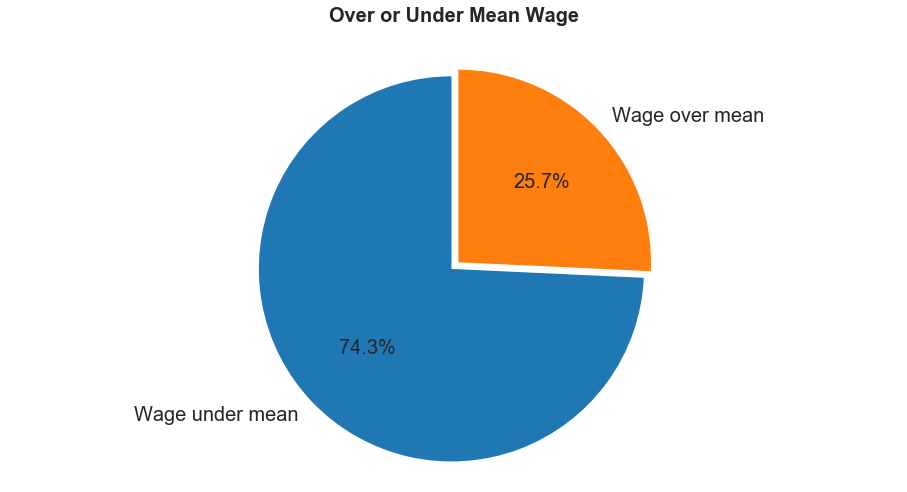

In [52]:
plt.figure(figsize=(16,8))
plt.title('Over or Under Mean Wage', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Wage under mean', 'Wage over mean'
explode=(0, 0.05)
plt.rcParams['font.size'] = 20.0
plt.pie(players_wage["NumberOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

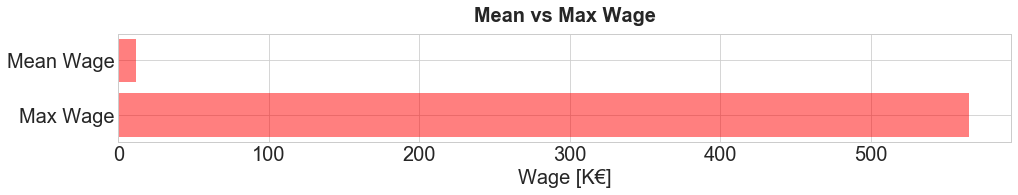

In [53]:
plt.figure(figsize=(16,2))
plt.title('Mean vs Max Wage', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Wage [K€]')

max_wage = dataset['WageNum'].max()
objects = ('Max Wage', 'Mean Wage')
y_pos = np.arange(len(objects))
performance = [max_wage/1000, mean_wage/1000]
 
plt.barh(y_pos, performance, align='center', alpha=0.5, color='red')
plt.yticks(y_pos, objects)

plt.show()

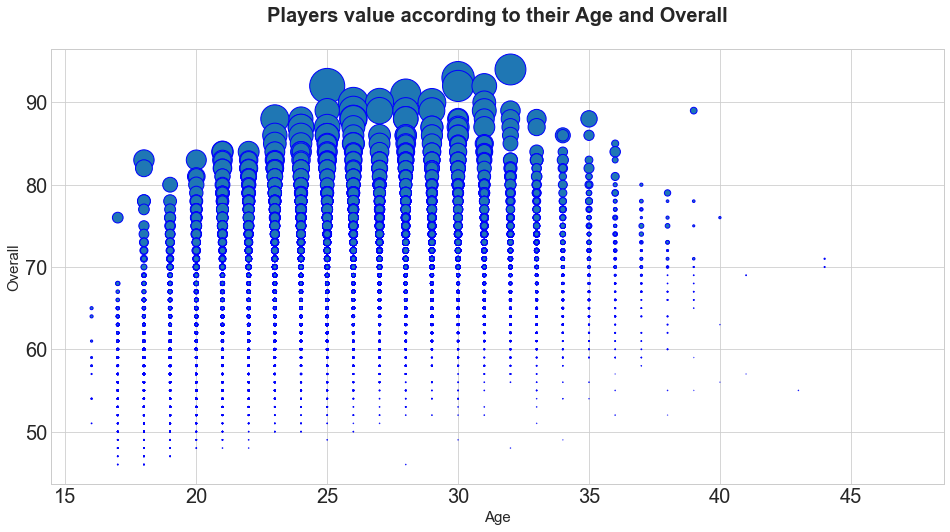

In [54]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks
plt.title('Players value according to their Age and Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='blue')
plt.show()

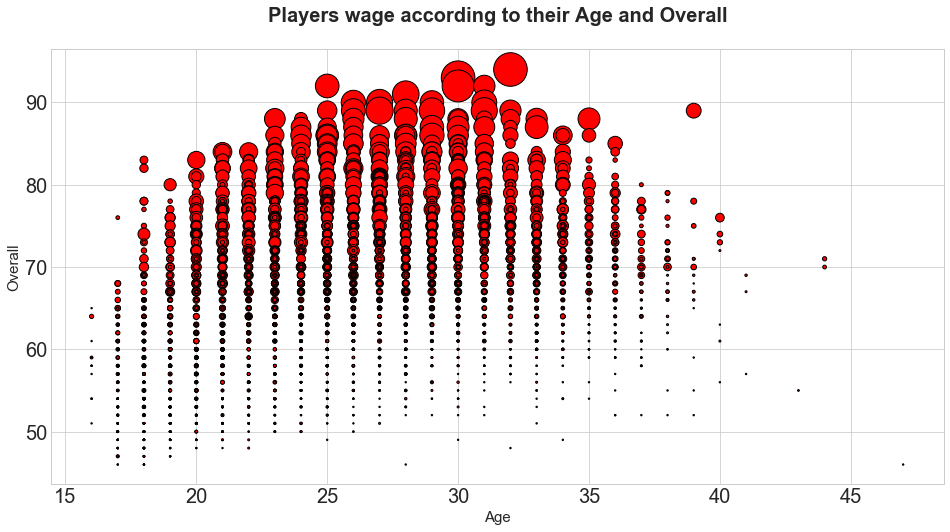

In [55]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players wage according to their Age and Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

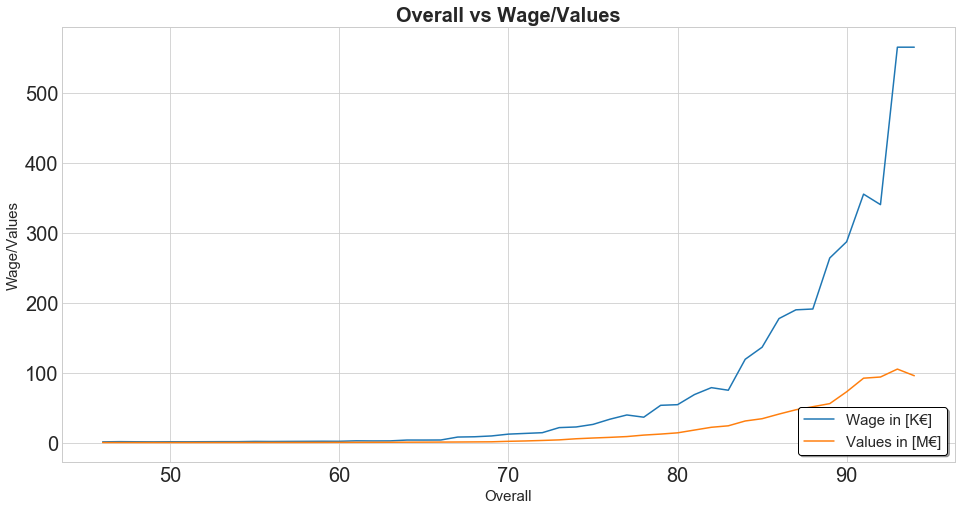

In [56]:
# Selecting unique Overall from DataFrame
overall = dataset.sort_values('Overall')['Overall'].unique()

overall_wage = dataset.groupby(['Overall'])['WageNum'].mean()
overall_wage = overall_wage.apply(lambda x: x/1000).values

overall_value = dataset.groupby(['Overall'])['ValueNum'].mean()
overall_value = overall_value.apply(lambda x: x/1000000).values

plt.figure(figsize=(16,8))
plt.title('Overall vs Wage/Values', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Wage/Values', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, overall_wage, label="Wage in [K€]")
plt.plot(overall, overall_value, label="Values in [M€]")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [57]:
player_position_value = dataset.groupby("Position").mean().reset_index()[["Position", "ValueNum"]]
player_position_value = player_position_value.sort_values(["ValueNum"], ascending=False)
player_position_value["ValueNum"] = player_position_value["ValueNum"].apply(lambda x: x/1000000).values.tolist()

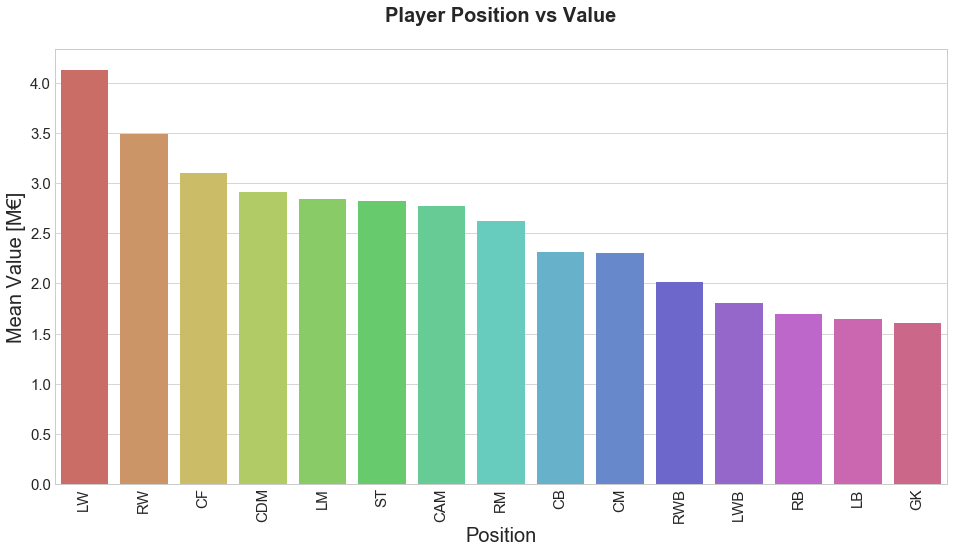

In [58]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Player Position vs Value', fontsize=20, fontweight='bold', y=1.05,)
sns.set(font_scale = 2)
b = sns.barplot(x="Position", y="ValueNum", data=player_position_value, palette="hls") #https://seaborn.pydata.org/tutorial/color_palettes.html
plt.xticks(rotation=90)
b.tick_params(labelsize=15)
plt.xlabel("Position", fontsize=20)
plt.ylabel('Mean Value [M€]', fontsize=20)
plt.show()

In [59]:
top_n = dataset.head(1000)
top_n = top_n.groupby("Age").mean().reset_index()[["Age", "ValueNum"]]
top_n["ValueNum"] = top_n["ValueNum"].apply(lambda x: x/1000000)
top_n_age = top_n['Age'].values
top_n_value = top_n['ValueNum'].values

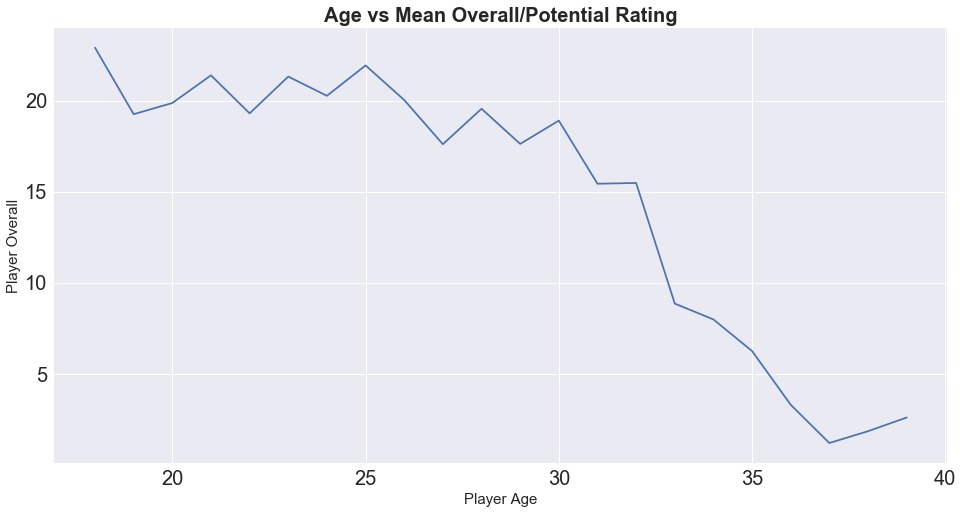

In [60]:
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(top_n_age, top_n_value)
plt.show()

In [61]:
top_teams = dataset.groupby("Club").sum().sort_values("ValueNum", ascending=False).head(20).reset_index()[["Club", "Overall", "PotentialPoints", "ValueNum"]]

In [62]:
top_teams

,Club,Overall,PotentialPoints,ValueNum
0,Real Madrid CF,2107,128,826700000.0
1,FC Bayern Munich,2065,132,748825000.0
2,FC Barcelona,2064,75,744500000.0
3,Chelsea,2530,196,673085000.0
4,Paris Saint-Germain,2183,151,631750000.0
5,Manchester United,2642,188,625300000.0
6,Juventus,2123,62,617100000.0
7,Manchester City,2446,272,578215000.0
8,Atlético Madrid,2428,195,566150000.0
9,Tottenham Hotspur,2348,262,516955000.0


In [63]:
trace1 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["Overall"].tolist(),
    name='Team Overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["PotentialPoints"].tolist(),
    name='Team Potential',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = top_teams["Club"].tolist(),
    y = (top_teams["ValueNum"] / 1000000).tolist(),
    name='Team Value [M€]',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Is it really worth it?',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Team Overall/Potential',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Club Name'),
    yaxis2=dict(
        title='Team Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 200
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [64]:
from  urllib.request import urlopen
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/2018_FIFA_World_Cup"
html = urlopen(url).read()
soup = BeautifulSoup(html, "lxml")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

wc = WordCloud(background_color="white", max_words=2000, mask=None)
wc.generate(text)

plt.figure(figsize = (16,10))
sns.set_style("whitegrid")

plt.title('World cloud', fontsize=14)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>